In [3]:
http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson?serviceKey=W9uG4PsP1SrVL0YhJyXX%2BxBV3TUD3jJDwkPLFiREuWbuGMtipqs8aUutMPQGwfKqWoKrLMLk5jwmAVj%2FicpZ8Q%3D%3D(URL 

SyntaxError: invalid syntax (Temp/ipykernel_10512/616227915.py, line 1)

In [203]:
import pandas as pd
import matplotlib.pyplot as plt

In [204]:
#리스트의 첫번째 인덱스 row만 가져와서
tbl_individualVO plist2 =  plist.get(0);
 
#변수pnu_code에 넣어줍니다.
String pnu_code = plist2.getPnu_code();
 

#변수 serviceKey에 인증키를 넣어주고
String serviceKey = "W9uG4PsP1SrVL0YhJyXX%2BxBV3TUD3jJDwkPLFiREuWbuGMtipqs8aUutMPQGwfKqWoKrLMLk5jwmAVj%2FicpZ8Q%3D%3D";
 
#각각의 정보를 넣어줍니다.
StringBuilder urlBuilder = new StringBuilder("http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson?serviceKey=W9uG4PsP1SrVL0YhJyXX%2BxBV3TUD3jJDwkPLFiREuWbuGMtipqs8aUutMPQGwfKqWoKrLMLk5jwmAVj%2FicpZ8Q%3D%3D(URL "); /* URL */
urlBuilder.append("?" + URLEncoder.encode("ServiceKey", "UTF-8") + "=" + serviceKey); /* Service Key */
urlBuilder.append("&" + URLEncoder.encode("pnu", "UTF-8") + "=" + URLEncoder.encode(pnu_code, "UTF-8")); /* pnu_code */
urlBuilder.append("&" + URLEncoder.encode("stdrYear", "UTF-8") + "=" + URLEncoder.encode("2020", "UTF-8")); /* year */
urlBuilder.append("&" + URLEncoder.encode("format", "UTF-8") + "=" + URLEncoder.encode("xml", "UTF-8")); /* 요청자료형식(XML/JSON)Default: XML */
urlBuilder.append("&" + URLEncoder.encode("numOfRows", "UTF-8") + "=" + URLEncoder.encode("5", "UTF-8")); /* page 출력 수 */
urlBuilder.append("&" + URLEncoder.encode("pageNo", "UTF-8") + "=" + URLEncoder.encode("1", "UTF-8")); /* 페이지 번호 */
 
#나중에 사용할 map을 선언해줍니다.
Map<String, Object> map = new HashMap<String, Object>();
 
URL url = new URL(urlBuilder.toString());
HttpURLConnection conn = (HttpURLConnection) url.openConnection();
conn.setRequestMethod("GET");
conn.setRequestProperty("Content-type", "application/json");
System.out.println("Response code: " + conn.getResponseCode());
BufferedReader rd;
 
#getResponseCode가 200이상 300이하일때는 정상적으로 작동합니다.
if (conn.getResponseCode() >= 200 && conn.getResponseCode() <= 300) {
    rd = new BufferedReader(new InputStreamReader(conn.getInputStream()));
} else {
    rd = new BufferedReader(new InputStreamReader(conn.getErrorStream()));
}
 
StringBuilder sb = new StringBuilder();
String line;
while ((line = rd.readLine()) != null) {
    sb.append(line);
}
rd.close();
conn.disconnect();
url =null;
#StringBuilder로 위에 파라미터 더 한값을 toString으로 불러옵니다.
#그리고 println으로 확인을 하면 xml형식이 나오게됩니다.
System.out.println(sb.toString());


SyntaxError: invalid syntax (Temp/ipykernel_7864/2542680480.py, line 2)

In [205]:
import requests 
import xmltodict 
import json 
import datetime 
def getCovidKR(end_day, start_day): 
    url='http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson' 
#ServiceKey는 url decode 한 값임. 
payload = { 
    'ServiceKey': 'sabcd............UAEbYA==',
    'startCreateDt' : start_day,
    'endCreateDt' : end_day, 
} 
res = requests.get(url, params=payload) 
if (res.status_code == 200): 
    # Ordered dictionary type 
    result = xmltodict.parse(res.text) 
    
    #dictionlay type 
    dd = json.loads(json.dumps(result)) 
    print ('누적 확진자:', dd['response']['body']['items']['item'][0]['decideCnt']) 
    print ('추가 확진자:', int(dd['response']['body']['items']['item'][0]['decideCnt']) - int(dd['response']['body']['items']['item'][1]['decideCnt'])) 
    print ('%s일 %s시 기준' %(dd['response']['body']['items']['item'][0]["stateDt"], dd['response']['body']['items']['item'][0]["stateTime"])) 
else: 
    print ('res.status_code is NOT ok') 
if __name__ == "__main__": 
    today =datetime.datetime.now() 
    yesterday = today - datetime.timedelta(1) 
    d1 = today.strftime("%Y%m%d") 
    d2 = yesterday.strftime("%Y%m%d") 
    getCovidKR(d1, d2)


NameError: name 'start_day' is not defined

In [206]:
from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus
import urllib
import requests
import pandas as pd
import xmltodict
import json
# 위에서 20200414~ 20220315 까지 데이터를 불러옵니다
key='W9uG4PsP1SrVL0YhJyXX%2BxBV3TUD3jJDwkPLFiREuWbuGMtipqs8aUutMPQGwfKqWoKrLMLk5jwmAVj%2FicpZ8Q%3D%3D'
url = f'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson?serviceKey={key}&'
queryParams = urlencode({ quote_plus('pageNo') : 1, 
                          quote_plus('numOfRows') : 10,
                          quote_plus('startCreateDt') : '20200414',
                          quote_plus('endCreateDt') : '20220315'})
url2 = url + queryParams
response = urlopen(url2)
print(type(response)) # HTTPSresponse 
results = response.read().decode("utf-8")
# print(type(results))   # str
results_to_json = xmltodict.parse(results)
data = json.loads(json.dumps(results_to_json))
print(type(data))   # dic
print(data)   
# {'accDefRate': '1.5093139972', 'accExamCnt': '4269316', 'accExamCompCnt': '4092389', 'careCnt': '17897', 
# 'clearCnt': '42953', 'createDt': '2021-01-01 09:36:53.691',                              'deathCnt': '917', 'decideCnt': '61767', 
# 'examCnt': '176927', 'resutlNegCnt': '4030622', 'seq': '372', 
# 'stateDt': '20210101', 'stateTime': '00:00', 'updateDt': '2021-01-03 10:35:39.056'}
corona=data['response']['body']['items']['item']
#추가하고 싶은 리스트 생성
Date=[]
Cnt=[]
#clear_cnt=[]
#care_cnt=[]
#death_cnt=[]
#exam_cnt=[]     # examCnt   검사중
for i in corona:
    Date.append(i['stateDt'])  #'stateDt': '20200801'
    Cnt.append(i['decideCnt'])  # decideCnt': '14336'   누적확진자
    #clear_cnt.append(i['clearCnt'])   # 13233           격리 해제환자
    #care_cnt.append(i['careCnt'])     # 802             치료중 환자
    #death_cnt.append(i['deathCnt'])    #301             사망자 수
df=pd.DataFrame([Date,Cnt])
df.columns=['날짜','누적확진자'] 
df=df.sort_values(by='날짜', ascending=True)
# df.columns=['Date','acc_cnt','clear_cnt','care_cnt','death_cnt']
# df=df.sort_values(by='Date', ascending=True)
# df.head()
# df.info()
# df.describe()
# csv 파일 생성
df.to_csv('sample.csv')
# 메모장
df.to_csv('sample.txt')

<class 'http.client.HTTPResponse'>
<class 'dict'>
{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'}, 'body': {'items': {'item': [{'createDt': '2022-03-15 09:08:41.063', 'deathCnt': '10888', 'decideCnt': '7228493', 'seq': '818', 'stateDt': '20220315', 'stateTime': '00:00', 'updateDt': '2022-03-19 09:46:47.468'}, {'createDt': '2022-03-14 09:01:32.362', 'deathCnt': '10595', 'decideCnt': '6866190', 'seq': '817', 'stateDt': '20220314', 'stateTime': '00:00', 'updateDt': '2022-03-19 09:47:04.422'}, {'createDt': '2022-03-13 09:13:37.486', 'deathCnt': '10395', 'decideCnt': '6556411', 'seq': '816', 'stateDt': '20220313', 'stateTime': '00:00', 'updateDt': '2022-03-19 09:47:34.07'}, {'createDt': '2022-03-12 08:53:24.338', 'deathCnt': '10144', 'decideCnt': '6206229', 'seq': '815', 'stateDt': '20220312', 'stateTime': '00:00', 'updateDt': '2022-03-19 09:47:59.929'}, {'createDt': '2022-03-11 08:56:23.53', 'deathCnt': '9875', 'decideCnt': '5822612', 'seq': '814', 'stateDt': '

ValueError: Length mismatch: Expected axis has 700 elements, new values have 2 elements

In [207]:
yourkey='W9uG4PsP1SrVL0YhJyXX%2BxBV3TUD3jJDwkPLFiREuWbuGMtipqs8aUutMPQGwfKqWoKrLMLk5jwmAVj%2FicpZ8Q%3D%3D'
# code = 20050164

# code_str = str(code)
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson?serviceKey='+yourkey
response = urlopen(url)
results = response.read().decode("utf-8")

results_to_json = xmltodict.parse(results)
data = json.loads(json.dumps(results_to_json))


In [208]:
data

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'},
  'body': {'items': None,
   'numOfRows': '10',
   'pageNo': '1',
   'totalCount': '0'}}}

In [209]:
data['response']['body']['items']['item']['decideCnt']

TypeError: 'NoneType' object is not subscriptable

In [210]:
sample = pd.read_csv('./sample.csv')

sample

FileNotFoundError: [Errno 2] No such file or directory: './sample.csv'

In [211]:




from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus
import urllib
import requests
import pandas as pd
import xmltodict
import json
# 위에서 20200414 부터 20220315 까지 데이터를 불러옵니다
key='W9uG4PsP1SrVL0YhJyXX%2BxBV3TUD3jJDwkPLFiREuWbuGMtipqs8aUutMPQGwfKqWoKrLMLk5jwmAVj%2FicpZ8Q%3D%3D'
url = f'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson?serviceKey={key}&'
queryParams = urlencode({ quote_plus('pageNo') : 1, 
                          quote_plus('numOfRows') : 10,
                          quote_plus('startCreateDt') : '20200414',
                          quote_plus('endCreateDt') : '20220315'})
url2 = url + queryParams
response = urlopen(url2)
print(type(response)) # HTTPSresponse 
results = response.read().decode("utf-8")
# print(type(results))   # str
results_to_json = xmltodict.parse(results)
data = json.loads(json.dumps(results_to_json))
print(type(data))   # dic
print(data)   

corona=data['response']['body']['items']['item'] #추가하고 싶은 리스트 생성
data_corona = []

for i in corona:
    data_corona.append([i['stateDt'],
                       i['decideCnt']])

df=pd.DataFrame(data_corona, columns=['날짜','누적확진자'] )

df=df.sort_values(by='날짜', ascending=True)

df.to_csv('./corona/corona_sample.csv', mode='a', encoding='utf-8', index=False) # csv 파일 생성

<class 'http.client.HTTPResponse'>
<class 'dict'>
{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'}, 'body': {'items': {'item': [{'createDt': '2022-03-15 09:08:41.063', 'deathCnt': '10888', 'decideCnt': '7228493', 'seq': '818', 'stateDt': '20220315', 'stateTime': '00:00', 'updateDt': '2022-03-19 09:46:47.468'}, {'createDt': '2022-03-14 09:01:32.362', 'deathCnt': '10595', 'decideCnt': '6866190', 'seq': '817', 'stateDt': '20220314', 'stateTime': '00:00', 'updateDt': '2022-03-19 09:47:04.422'}, {'createDt': '2022-03-13 09:13:37.486', 'deathCnt': '10395', 'decideCnt': '6556411', 'seq': '816', 'stateDt': '20220313', 'stateTime': '00:00', 'updateDt': '2022-03-19 09:47:34.07'}, {'createDt': '2022-03-12 08:53:24.338', 'deathCnt': '10144', 'decideCnt': '6206229', 'seq': '815', 'stateDt': '20220312', 'stateTime': '00:00', 'updateDt': '2022-03-19 09:47:59.929'}, {'createDt': '2022-03-11 08:56:23.53', 'deathCnt': '9875', 'decideCnt': '5822612', 'seq': '814', 'stateDt': '

In [216]:
corona = pd.read_csv('./corona/corona_sample.csv')

corona

,날짜,누적확진자
0,20200414,10564
1,20200415,10591
2,20200416,10613
3,20200417,10635
4,20200418,10653
...,...,...
1396,20220311,5822612
1397,20220312,6206229
1398,20220313,6556411
1399,20220314,6866190


In [217]:
import pandas as pd

In [218]:
corona.info()

corona = corona.astype({'날짜':'str'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1401 non-null   object
 1   누적확진자   1401 non-null   object
dtypes: object(2)
memory usage: 22.0+ KB


In [219]:
corona.dtypes

날짜       object
누적확진자    object
dtype: object

In [220]:
import calendar
calendar.monthrange(2002,1)
#(1, 31)

(1, 31)

In [222]:
#corona['날짜'] = corona['날짜'].astype(str)
#corona['날짜_datetime'] = pd.to_datetime(corona['날짜'])
#corona['날짜_datetime'] = corona['날짜'].dt.tz_localize('UTC')

In [223]:
corona.dtypes

날짜       object
누적확진자    object
dtype: object

In [224]:
calendar.monthrange(2020, 4)
# (요일, 달의 마지막 날짜)

(2, 30)

In [225]:
a = (2020, 2021, 2022)
a

(2020, 2021, 2022)

In [226]:
#for i in corona:
#     data_corona.append([i['stateDt'],
#                        i['decideCnt']])

# df=pd.DataFrame(data_corona, columns=['날짜','누적확진자'] )

# df=df.sort_values(by='날짜', ascending=True)

TypeError: string indices must be integers

In [227]:
# for i in range(1,12) :
#     data.append(calendar.monthrange(2020, i)[1])


AttributeError: 'dict' object has no attribute 'append'

In [228]:
for i in range(1,13) :
    a = [str(2020) + str(i) + str(calendar.monthrange(2020, i)[1])]
    b = [str(2021) + str(i) + str(calendar.monthrange(2021, i)[1])]
    c = [str(2022) + str(i) + str(calendar.monthrange(2022, i)[1])]
    
    d = a+b+c
    
    print(d)
    
df=pd.DataFrame(d, columns=['마지막'] )

['2020131', '2021131', '2022131']
['2020229', '2021228', '2022228']
['2020331', '2021331', '2022331']
['2020430', '2021430', '2022430']
['2020531', '2021531', '2022531']
['2020630', '2021630', '2022630']
['2020731', '2021731', '2022731']
['2020831', '2021831', '2022831']
['2020930', '2021930', '2022930']
['20201031', '20211031', '20221031']
['20201130', '20211130', '20221130']
['20201231', '20211231', '20221231']


In [229]:
df

,마지막
0,20201231
1,20211231
2,20221231


In [276]:
a = []
for i in range(1,13) :
    a.append(str(2020) + str(i).zfill(2) + str(calendar.monthrange(2020, i)[1]))
    

b = []
for i in range(1,13) :
    b.append(str(2021) + str(i).zfill(2) + str(calendar.monthrange(2021, i)[1]))
    

c = []
for i in range(1,13) :
    c.append(str(2022) + str(i).zfill(2) + str(calendar.monthrange(2022, i)[1]))
    
d = a+b+c
print(d)

['20200131', '20200229', '20200331', '20200430', '20200531', '20200630', '20200731', '20200831', '20200930', '20201031', '20201130', '20201231', '20210131', '20210228', '20210331', '20210430', '20210531', '20210630', '20210731', '20210831', '20210930', '20211031', '20211130', '20211231', '20220131', '20220228', '20220331', '20220430', '20220531', '20220630', '20220731', '20220831', '20220930', '20221031', '20221130', '20221231']


In [231]:
d = a+b+c

In [232]:
d

['20200131',
 '20200229',
 '20200331',
 '20200430',
 '20200531',
 '20200630',
 '20200731',
 '20200831',
 '20200930',
 '20201031',
 '20201130',
 '20201231',
 '20210131',
 '20210228',
 '20210331',
 '20210430',
 '20210531',
 '20210630',
 '20210731',
 '20210831',
 '20210930',
 '20211031',
 '20211130',
 '20211231',
 '20220131',
 '20220228',
 '20220331',
 '20220430',
 '20220531',
 '20220630',
 '20220731',
 '20220831',
 '20220930',
 '20221031',
 '20221130',
 '20221231']

In [277]:
corona['날짜']

0       20200414
1       20200415
2       20200416
3       20200417
4       20200418
          ...   
1396    20220311
1397    20220312
1398    20220313
1399    20220314
1400    20220315
Name: 날짜, Length: 1401, dtype: object

In [283]:
corona_mo = corona[corona['날짜'].isin(d)]

corona_mo.reset_index(drop = False,inplace = True)

corona_mo = corona_mo[:22]

corona_mo

,index,날짜,누적확진자
0,16,20200430,10765
1,46,20200531,11468
2,76,20200630,12799
3,107,20200731,14305
4,138,20200831,19946
5,168,20200930,23811
6,199,20201031,26511
7,229,20201130,34199
8,260,20201231,60726
9,291,20210131,78197


In [279]:
corona_mo.reset_index(drop = False,inplace = True)

In [281]:
corona_mo = corona_mo[:22]

In [282]:
corona_mo

,index,날짜,누적확진자
0,16,20200430,10765
1,46,20200531,11468
2,76,20200630,12799
3,107,20200731,14305
4,138,20200831,19946
5,168,20200930,23811
6,199,20201031,26511
7,229,20201130,34199
8,260,20201231,60726
9,291,20210131,78197


2020년 5월 ~ 2021년 12월

In [253]:
int(corona_mo['누적확진자'][1])

11468

In [18]:
mo = [0 ,corona_mo['누적확진자'][1] -corona_mo['누적확진자'][0],
corona_mo['누적확진자'][2] -corona_mo['누적확진자'][1],
corona_mo['누적확진자'][3] -corona_mo['누적확진자'][2],
corona_mo['누적확진자'][4] -corona_mo['누적확진자'][3],
corona_mo['누적확진자'][5] -corona_mo['누적확진자'][4],
corona_mo['누적확진자'][6] -corona_mo['누적확진자'][5],
corona_mo['누적확진자'][7] -corona_mo['누적확진자'][6],
corona_mo['누적확진자'][8] -corona_mo['누적확진자'][7],
corona_mo['누적확진자'][9] -corona_mo['누적확진자'][8],
corona_mo['누적확진자'][10] -corona_mo['누적확진자'][9],
corona_mo['누적확진자'][11] -corona_mo['누적확진자'][10],
corona_mo['누적확진자'][12] -corona_mo['누적확진자'][11],
corona_mo['누적확진자'][13] -corona_mo['누적확진자'][12],
corona_mo['누적확진자'][14] -corona_mo['누적확진자'][13],
corona_mo['누적확진자'][15] -corona_mo['누적확진자'][14],
corona_mo['누적확진자'][16] -corona_mo['누적확진자'][15],
corona_mo['누적확진자'][17] -corona_mo['누적확진자'][16],
corona_mo['누적확진자'][18] -corona_mo['누적확진자'][17],
corona_mo['누적확진자'][19] -corona_mo['누적확진자'][18],
corona_mo['누적확진자'][20] -corona_mo['누적확진자'][19],
corona_mo['누적확진자'][21] -corona_mo['누적확진자'][20],
corona_mo['누적확진자'][22] -corona_mo['누적확진자'][21]]

In [260]:
mo2 = [0]

In [261]:
mo2 = [0]

for i in range(1, 22) : 
    corona_num = int(corona_mo['누적확진자'][i]) - int(corona_mo['누적확진자'][i-1])
    mo2.append(corona_num)
mo2

[0,
 703,
 1331,
 1506,
 5641,
 3865,
 2700,
 7688,
 26527,
 17471,
 11467,
 13415,
 18927,
 18331,
 16623,
 41374,
 53079,
 59863,
 53421,
 82525,
 183606,
 214860]

In [263]:
len(mo2)

22

In [317]:
mo

[0,
 703,
 1331,
 1506,
 5641,
 3865,
 2700,
 7688,
 26527,
 17471,
 11467,
 13415,
 18927,
 18331,
 16623,
 41374,
 53079,
 59863,
 53421,
 82525,
 183606,
 214860,
 2288753]

In [287]:
corona_mo

,index,날짜,누적확진자,월별확진자수
0,16,20200430,10765,0
1,46,20200531,11468,703
2,76,20200630,12799,1331
3,107,20200731,14305,1506
4,138,20200831,19946,5641
5,168,20200930,23811,3865
6,199,20201031,26511,2700
7,229,20201130,34199,7688
8,260,20201231,60726,26527
9,291,20210131,78197,17471


In [286]:
corona_mo.insert(3, '월별확진자수', mo2)

corona_mo

ValueError: cannot insert 월별확진자수, already exists

In [285]:
corona_mo

,index,날짜,누적확진자,월별확진자수
0,16,20200430,10765,0
1,46,20200531,11468,703
2,76,20200630,12799,1331
3,107,20200731,14305,1506
4,138,20200831,19946,5641
5,168,20200930,23811,3865
6,199,20201031,26511,2700
7,229,20201130,34199,7688
8,260,20201231,60726,26527
9,291,20210131,78197,17471


In [300]:
corona_mo['날짜'].str[4:6]

0     04
1     05
2     06
3     07
4     08
5     09
6     10
7     11
8     12
9     01
10    02
11    03
12    04
13    05
14    06
15    07
16    08
17    09
18    10
19    11
20    12
21    01
Name: 날짜, dtype: object

In [304]:
corona_mo.insert(3, ' 월 ', corona_mo['날짜'].str[4:6])

corona_mo

,index,날짜,누적확진자,월,월,월별확진자수
0,16,20200430,10765,04,202004,0
1,46,20200531,11468,05,202005,703
2,76,20200630,12799,06,202006,1331
3,107,20200731,14305,07,202007,1506
4,138,20200831,19946,08,202008,5641
5,168,20200930,23811,09,202009,3865
6,199,20201031,26511,10,202010,2700
7,229,20201130,34199,11,202011,7688
8,260,20201231,60726,12,202012,26527
9,291,20210131,78197,01,202101,17471


In [270]:
corona_mo

,index,날짜,누적확진자,월,월별확진자수
0,16,20200430,10765,202004,0
1,46,20200531,11468,202005,703
2,76,20200630,12799,202006,1331
3,107,20200731,14305,202007,1506
4,138,20200831,19946,202008,5641
5,168,20200930,23811,202009,3865
6,199,20201031,26511,202010,2700
7,229,20201130,34199,202011,7688
8,260,20201231,60726,202012,26527
9,291,20210131,78197,202101,17471


In [312]:
corona_mon = corona_mo[['월','월별확진자수']]

In [313]:
corona_mon

,월,월별확진자수
0,202004,0
1,202005,703
2,202006,1331
3,202007,1506
4,202008,5641
5,202009,3865
6,202010,2700
7,202011,7688
8,202012,26527
9,202101,17471


In [27]:
# csv 파일 생성
corona_mon.to_csv('./corona/corona_mon.csv', mode='w', encoding='utf-8', index=False)

In [342]:
corona_mon[1:]

,월,월별확진자수
1,202005,703
2,202006,1331
3,202007,1506
4,202008,5641
5,202009,3865
6,202010,2700
7,202011,7688
8,202012,26527
9,202101,17471
10,202102,11467


In [343]:
corona_month_1

,월,월별확진자수
9,202101,17471
10,202102,11467
11,202103,13415
12,202104,18927
13,202105,18331
14,202106,16623
15,202107,41374
16,202108,53079
17,202109,59863
18,202110,53421


In [6]:
# 시각화 라이브러리 불러들이기
import matplotlib.pyplot as plt

In [12]:
import pandas as pd

In [13]:
plt.rc('font', family = 'Malgun Gothic')

In [14]:
corona = pd.read_csv('./corona/corona_mon.csv')

In [340]:
corona

,날짜,누적확진자
0,20200414,10564
1,20200415,10591
2,20200416,10613
3,20200417,10635
4,20200418,10653
...,...,...
1396,20220311,5822612
1397,20220312,6206229
1398,20220313,6556411
1399,20220314,6866190


In [338]:
corona_month

,월,월별확진자수
1,202005,703
2,202006,1331
3,202007,1506
4,202008,5641
5,202009,3865
6,202010,2700
7,202011,7688
8,202012,26527


In [42]:
corona_month_1 = corona.loc[9:20]

In [322]:
corona_month_1

,월,월별확진자수
9,202101,17471
10,202102,11467
11,202103,13415
12,202104,18927
13,202105,18331
14,202106,16623
15,202107,41374
16,202108,53079
17,202109,59863
18,202110,53421


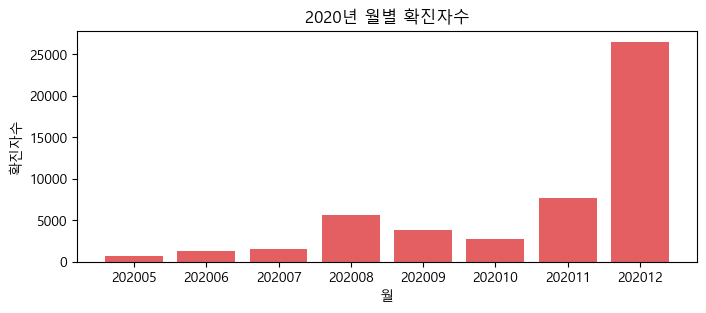

In [339]:
# 타이틀 설정
plt.title('2020년 월별 확진자수')
# x축 라벨 설정
plt.xlabel('월')
# y축 라벨 설정
plt.ylabel('확진자수')

# 막대 그래프(x, y)
plt.bar(corona_month['월'], corona_month['월별확진자수'], color='#e35f62')
# 그래프 출력
plt.show()

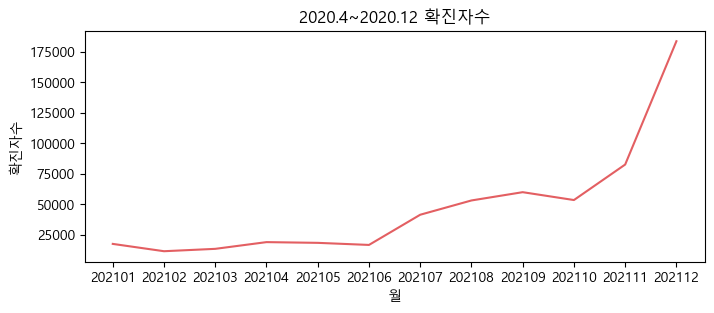

In [293]:
# 타이틀 설정
plt.title('2020.4~2020.12 확진자수')
# x축 라벨 설정
plt.xlabel('월')
# y축 라벨 설정
plt.ylabel('확진자수')

# 선그래프 그리기
plt.plot(corona_month['월'], corona_month['월별확진자수'], color='#e35f62')

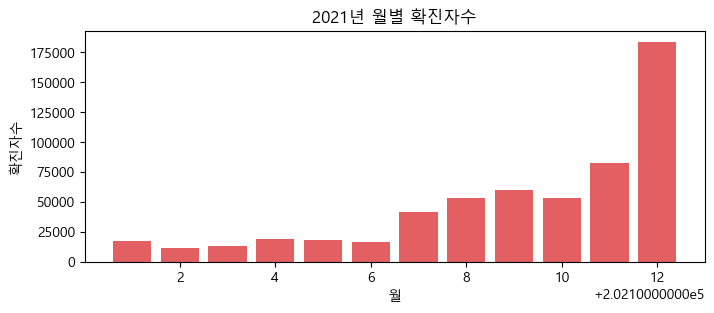

In [323]:
# 타이틀 설정
plt.title('2021년 월별 확진자수')
# x축 라벨 설정
plt.xlabel('월')
# y축 라벨 설정
plt.ylabel('확진자수')

# 막대 그래프(x, y)
plt.bar(corona_month_1['월'], corona_month_1['월별확진자수'], color='#e35f62')
# 그래프 출력
plt.show()

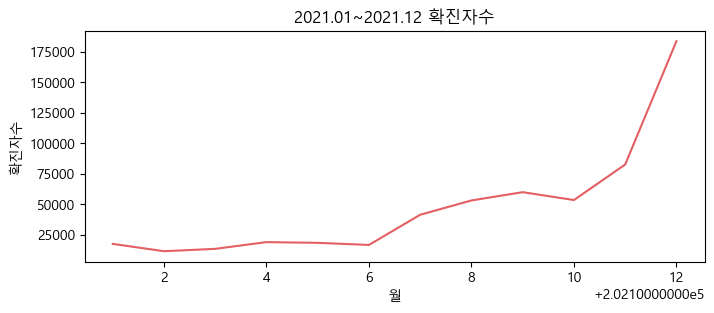

In [295]:
# 타이틀 설정
plt.title('2021.01~2021.12 확진자수')
# x축 라벨 설정
plt.xlabel('월')
# y축 라벨 설정
plt.ylabel('확진자수')

# 선그래프 그리기
plt.plot(corona_month_1['월'], corona_month_1['월별확진자수'], color='#e35f62')

In [169]:
people_2020_month = pd.read_csv('./movie_data/2020_movie_peole.csv')

In [170]:
people_2020_month

,월,관객수
0,4,689082
1,5,1203205
2,6,3574092
3,7,5341937
4,8,8635700
5,9,2839263
6,10,4263727
7,11,3256631
8,12,1238204


In [172]:
people_2020_month['관객수'][1:]

1    1203205
2    3574092
3    5341937
4    8635700
5    2839263
6    4263727
7    3256631
8    1238204
Name: 관객수, dtype: int64

In [64]:
people_2021_month_group = pd.read_csv('./movie_data/2021_movie_people.csv')

In [107]:
people_2021_month_group

,월,관객수
0,1,16105084
1,2,7062778
2,3,1504272
3,4,689082
4,5,1203205
5,6,3574092
6,7,5341937
7,8,8635700
8,9,2839263
9,10,4263727


In [108]:
people_2020_month

[689082,
 1203205,
 3574092,
 5341937,
 8635700,
 2839263,
 4263727,
 3256631,
 1238204]

In [102]:
people_2020_month[1:]

[1203205, 3574092, 5341937, 8635700, 2839263, 4263727, 3256631, 1238204]

C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from c

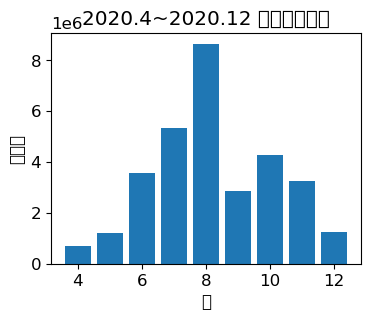

In [77]:
# 타이틀 설정
plt.title('2020.4~2020.12 관람객누적수')
# x축 라벨 설정
plt.xlabel('월')
# y축 라벨 설정
plt.ylabel('관객수')

# 막대 그래프(x, y)
plt.bar(people_2020_month['월'], people_2020_month['관객수'])

# 그래프 출력
plt.show()

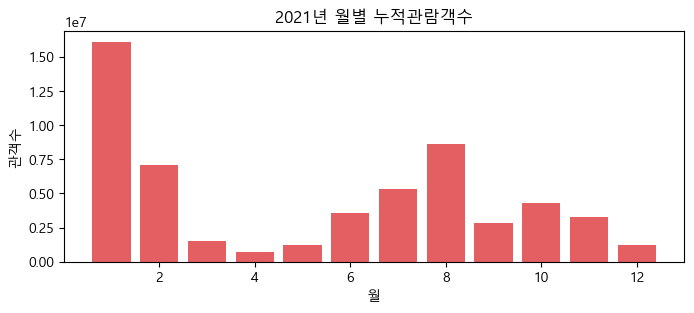

In [291]:
# 타이틀 설정
plt.title('2021년 월별 누적관람객수')
# x축 라벨 설정
plt.xlabel('월')
# y축 라벨 설정
plt.ylabel('관객수')

# 막대 그래프(x, y)
plt.bar(people_2021_month_group['월'], people_2021_month_group['관객수'], color='#e35f62')
# 그래프 출력
plt.show()

import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(2020, 2027)
y1 = np.array([1, 3, 7, 5, 9, 7, 14])
y2 = np.array([1, 3, 5, 7, 9, 11, 13])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='Price')
ax1.set_ylim(0, 18)
ax1.set_xlabel('Year')
ax1.set_ylabel('Price ($)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='Demand', alpha=0.7, width=0.7)
ax2.set_ylim(0, 18)
ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

plt.show()

In [67]:
import matplotlib.pyplot as plt
import numpy as np

In [68]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

In [87]:
# 2. 데이터 준비
x = np.arange(4,12)
y1 = np.array(corona_month_2020)
y2 = np.array(people_2020_month)

In [81]:
corona_month_2020 = list(corona_month['월별확진자수'])

In [167]:
len(corona_month_2020)

8

In [173]:
people_2020_month = list(people_2020_month['관객수'][1:])

In [174]:
len(people_2020_month)

8

In [92]:
plt.rc('font', family = 'Malgun Gothic')

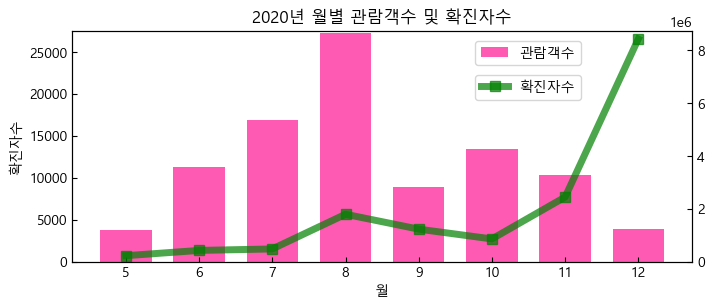

In [202]:


plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 3)
plt.rcParams['font.size'] = 12

plt.rc('font', family='Malgun Gothic', size = 10)

x = np.arange(5, 13)
y1 = np.array(corona_month_2020)
y2 = np.array(people_2020_month)


fig, ax1 = plt.subplots()


plt.title('2020년 월별 관람객수 및 확진자수')

ax1.plot(x, y1, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='확진자수')
ax1.set_ylim(0, 27527)
ax1.set_xlabel('월')
ax1.set_ylabel('확진자수')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='관람객수', alpha=0.7, width=0.7)
ax2.set_ylim(0, 8735700)
#ax2.set_ylabel('관람객수')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc= (0.65, 0.7))
ax2.legend(loc= (0.65, 0.85))

plt.show()

In [122]:
list(people_2021_month_group["관객수"])

[16105084,
 7062778,
 1504272,
 689082,
 1203205,
 3574092,
 5341937,
 8635700,
 2839263,
 4263727,
 3256631,
 1238204]

In [123]:
list(corona_month_1["월별확진자수"])

[17471,
 11467,
 13415,
 18927,
 18331,
 16623,
 41374,
 53079,
 59863,
 53421,
 82525,
 183606]

In [ ]:
list(people_2021_month_group["관객수"])

In [132]:
corona_month_2021 = list(corona_month_1['월별확진자수'])

In [143]:
len(corona_month_2021)

12

In [147]:
people_2021_month_group['관객수']

0     16105084
1      7062778
2      1504272
3       689082
4      1203205
5      3574092
6      5341937
7      8635700
8      2839263
9      4263727
10     3256631
11     1238204
Name: 관객수, dtype: int64

In [148]:
people_2021_month = list(people_2021_month_group['관객수'])

In [150]:
len(people_2021_month)

12

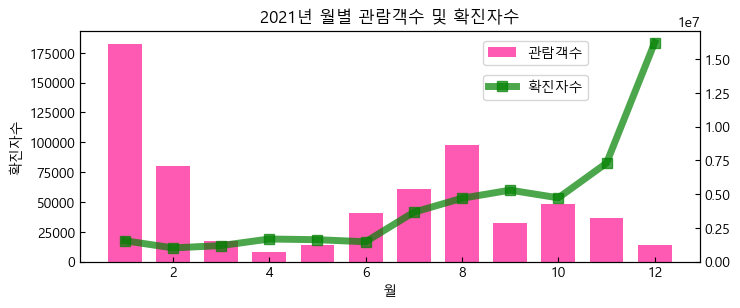

In [201]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 3)
plt.rcParams['font.size'] = 12

plt.rc('font', family='Malgun Gothic', size = 10)

# 2. 데이터 준비
x = np.arange(1, 13)
y1 = np.array(corona_month_2021)
y2 = np.array(people_2021_month)


# 3. 그래프 그리기
fig, ax1 = plt.subplots()

# 타이틀 설정
plt.title('2021년 월별 관람객수 및 확진자수')

ax1.plot(x, y1, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='확진자수')
ax1.set_ylim(0, 193606)
ax1.set_xlabel('월')
ax1.set_ylabel('확진자수')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='관람객수', alpha=0.7, width=0.7)
ax2.set_ylim(0, 17105084)
#ax2.set_ylabel('관람객수')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc= (0.65, 0.7))
ax2.legend(loc= (0.65, 0.85))

plt.show()